In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import matplotlib as mpl

In [2]:
from hyperopt import Trials, STATUS_OK, tpe
import optim
from hyperopt.hp import choice
from hyperopt.hp import uniform
import tensorflow as tf
from __future__ import print_function
from hyperas import optim
from hyperas.distributions import choice, uniform#, conditional


Using TensorFlow backend.


In [3]:
import keras

In [4]:
from keras.layers import Dense,Dropout,Flatten,Conv1D,MaxPooling1D,Input,Conv2D,MaxPooling2D,Reshape,SeparableConv1D,BatchNormalization
from keras.models import Sequential,Model
from keras.optimizers import Adam,sgd
import keras.optimizers

In [5]:
from keras.utils import to_categorical

In [6]:
Adam = keras.optimizers.Adam(lr=0.001,beta_1=0.9,beta_2=0.9)



# Cargo datos y quito columna indices

In [7]:
caracteristicas=np.loadtxt('/../Users/kike/Desktop/Master/TFM/characteristics_todas.dat')
labels=np.loadtxt('/../Users/kike/Desktop/Master/TFM/labels_todas.dat')

In [8]:
labels0=labels[0:5400,0]
labels0=labels0.reshape(5400,1,1)


In [9]:
labels0=labels[0:5400,0]
labels0=labels0.reshape(5400,1,1)
labels1=labels[0:5400,1]
labels1=labels1.reshape(5400,1,1)
labels2=labels[0:5400,2]
labels2=labels2.reshape(5400,1,1)
labels3=labels[0:5400,3]
labels3=labels3.reshape(5400,1,1)
labels4=labels[0:5400,4]
labels4=labels4.reshape(5400,1,1)

In [10]:
#labels0.shape

In [11]:
carac=caracteristicas[0:5400,1:13]

In [12]:
print(carac.shape)
n_cols=carac.shape[1]

(5400, 12)


In [13]:
#X=carac0.reshape(5400,1,1)
#X.shape
#Y=labels0.reshape(5400,1,1)
#X.shape

# Normalización y reshape

In [14]:
mean=carac.mean(axis=0)
carac -= mean
std = carac.std(axis=0)
carac /=std
print(carac.shape[1])


12


In [15]:
meany=labels.mean(axis=0)
labels -= meany
stdy = labels.std(axis=0)
labels /=stdy
print(labels.shape[1])

5


In [16]:
carac=carac.reshape(5400,1,12)
labels=labels.reshape(5400,1,5)
carac.shape

(5400, 1, 12)

# Método Sequential

In [17]:
carac=carac.reshape(40,135,12)
labels=labels.reshape(40,135,5)
labels0=labels0.reshape(40,135,1) 
labels1=labels1.reshape(40,135,1)
labels2=labels2.reshape(40,135,1)
labels3=labels3.reshape(40,135,1)
labels4=labels4.reshape(40,135,1)

In [18]:
carac=carac.reshape(5400,1,12)
labels=labels.reshape(5400,1,5)
labels0=labels0.reshape(5400,1,1)
labels1=labels1.reshape(5400,1,1)
labels2=labels2.reshape(5400,1,1)
labels3=labels3.reshape(5400,1,1)
labels4=labels4.reshape(5400,1,1)

In [19]:
Adam = keras.optimizers.Adam(lr=0.001,beta_1=0.9,beta_2=0.9)
sgd=keras.optimizers.SGD(learning_rate=0.02, momentum=0.1, nesterov=False)

Train on 3779 samples, validate on 1621 samples
Epoch 1/10000
3779/3779 [==============================] - 0s 112us/step - loss: 0.7414 - mse: 0.7414 - val_loss: 1.6189 - val_mse: 1.6189
Epoch 2/10000
3779/3779 [==============================] - 0s 66us/step - loss: 0.6635 - mse: 0.6635 - val_loss: 1.5921 - val_mse: 1.5921
Epoch 3/10000
3779/3779 [==============================] - 0s 76us/step - loss: 0.6484 - mse: 0.6484 - val_loss: 1.5863 - val_mse: 1.5863
Epoch 4/10000
3779/3779 [==============================] - 0s 63us/step - loss: 0.6446 - mse: 0.6446 - val_loss: 1.5863 - val_mse: 1.5863
Epoch 5/10000
3779/3779 [==============================] - 0s 65us/step - loss: 0.6434 - mse: 0.6434 - val_loss: 1.5863 - val_mse: 1.5863
Epoch 6/10000
3779/3779 [==============================] - 0s 83us/step - loss: 0.6430 - mse: 0.6430 - val_loss: 1.5880 - val_mse: 1.5880
Epoch 7/10000
3779/3779 [==============================] - 0s 75us/step - loss: 0.6428 - mse: 0.6428 - val_loss: 1.5854 - v

3779/3779 [==============================] - 0s 63us/step - loss: 0.6426 - mse: 0.6426 - val_loss: 1.5850 - val_mse: 1.5850
Epoch 60/10000
3779/3779 [==============================] - 0s 52us/step - loss: 0.6426 - mse: 0.6426 - val_loss: 1.5860 - val_mse: 1.5860
Epoch 61/10000
3779/3779 [==============================] - 0s 44us/step - loss: 0.6426 - mse: 0.6426 - val_loss: 1.5856 - val_mse: 1.5856
Epoch 62/10000
3779/3779 [==============================] - 0s 47us/step - loss: 0.6425 - mse: 0.6425 - val_loss: 1.5832 - val_mse: 1.5832
Epoch 63/10000
3779/3779 [==============================] - 0s 49us/step - loss: 0.6426 - mse: 0.6426 - val_loss: 1.5826 - val_mse: 1.5826
Epoch 64/10000
3779/3779 [==============================] - 0s 69us/step - loss: 0.6425 - mse: 0.6425 - val_loss: 1.5862 - val_mse: 1.5862
Epoch 65/10000
3779/3779 [==============================] - 0s 60us/step - loss: 0.6426 - mse: 0.6426 - val_loss: 1.5859 - val_mse: 1.5859
Epoch 66/10000
3779/3779 [================

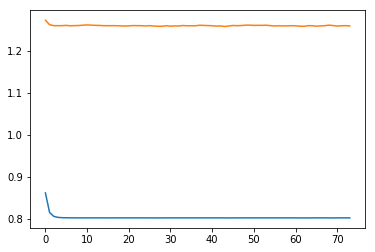

In [20]:
modelo=Sequential()
modelo.add(Conv1D(padding='same',filters=5,kernel_size=10
                  ,input_shape=(1,12)
                  #,strides=2
                 ))
modelo.add=MaxPooling1D(100)
#modelo.add=Conv1D(filters=10,kernel_size=8,padding='same')
#modelo.add=MaxPooling1D(20)
#modelo.add=BatchNormalization(axis=-1)
#modelo.add=Flatten()
modelo.add=Dense(30,activation='tanh')
#modelo.add=Dense(10,activation='tanh')
modelo.add=Dense(5,activation='linear')
EarlyStopping=keras.callbacks.EarlyStopping(monitor='val_loss', patience=30, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
modelo.compile(loss=keras.losses.mse,optimizer=sgd,metrics=['mse']) 
history=modelo.fit(x=carac,y=labels,batch_size=40,epochs=10000,verbose=1,validation_split=0.3,
                   callbacks=[EarlyStopping]
                  )
plt.figure()
plt.plot(np.sqrt(history.history['loss']))
plt.plot(np.sqrt(history.history['val_loss']))

labels0 es metalicidad

labels1 edad media pesada en masa 

labels2 edad media pesada en luz

labels3 HdA

labels4 D4000



In [21]:
maximo0=np.max(labels0)
minimo0=np.min(labels0)
maximo1=np.max(labels1)
minimo1=np.min(labels1)
maximo2=np.max(labels2)
minimo2=np.min(labels2)
maximo3=np.max(labels3)
minimo3=np.min(labels3)
maximo4=np.max(labels4)
minimo4=np.min(labels4)
print(maximo0)
print(minimo0)
print(maximo1)
print(minimo1)
print(maximo2)
print(minimo2)
print(maximo3)
print(minimo3)
print(maximo4)
print(minimo4)

1.9061005844776393
-0.9160571620865134
3.3906358598478246
-1.2537175457277216
4.177340742630897
-1.7166074677022694
1.4237007211476143
-4.226903996196858
5.160011907631329
-1.2266350147101979


# Aqui empiezo con Hyperas


Voy a separar entre datos de entrenamiento y de test:

In [22]:
X_train=carac[0:3800,0,0:12]
X_test=carac[3800:5401,0,0:12]
Y_train=labels[0:3800,0,0:5]
Y_test=labels[3800:5400,0,0:5]
Y0_train=labels[0:3800,0,0]
Y0_test=labels[3800:5400,0,0]
Y1_train=labels[0:3800,0,1]
Y1_test=labels[3800:5400,0,1]
Y2_train=labels[0:3800,0,2]
Y2_test=labels[3800:5400,0,2]
Y3_train=labels[0:3800,0,3]
Y3_test=labels[3800:5400,0,3]
Y4_train=labels[0:3800,0,4]
Y4_test=labels[3800:5400,0,4]

Esto es de la web de hyperas adaptado en mis datos pero aun no se muy bien como funciona

In [30]:
def create_model(X_train,Y_train, X_test, Y_test):
    model=Sequential()
    model.add(Conv1D(padding='same',filters=5
                  ,kernel_size=({{choice([10,30,50,100])}})
                  ,input_shape=(1,12)
                  #,strides=2
                 ))
    model.add=Dense(5,activation='linear') #capa de salida
    model.compile(loss=keras.losses.mse,optimizer=sgd,metrics=['mse']) 
    result=model.fit(X_train, Y_train
             ,batch_size={{choice([40,60,80])}}
             ,verbose=1
             ,epochs=100
             ,show_accuracy=True
             ,validation_data=(X_test, Y_test)
             )
    score,acc = model.evaluate(X_test,Y_test,show_accuracy=True,verbose=0)
    print('Test accuracy:',acc)
    return {'loss': -acc, 'status': STATUS_OK, 'model': model}



In [31]:
def data():
    return X_train, Y_train, X_test, Y_test

In [34]:
#if __name__ == '__main__':
best_run, best_model = optim.minimize(model=create_model,
                                    data=data,
                                    algo=tpe.suggest,
                                    max_evals=5,
                                    trials = Trials()
                                    )
X_train, Y_train, X_test, Y_test = data()
print("Evaluation of best performing model:")
print(best_model.evaluate(X_test,Y_test))

IOError: [Errno 2] No such file or directory: '/Users/kike/Desktop/Master/TFM/<ipython-input-34-8b868cd8614c>'

In [ ]:
plt.figure()
plt.plot(np.sqrt(history.result['loss']))
plt.plot(np.sqrt(history.result['val_loss']))
